In [195]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re

# load in data 
salaries = pd.read_csv("../Desktop/salaries.csv")
nba_2020_stats = pd.read_csv("../Desktop/nba_stats.csv")

In [196]:
for row in range(len(nba_2020_stats)):
    nba_2020_stats.loc[row, "Player"] = nba_2020_stats['Player'][row][:nba_2020_stats['Player'][row].index('\\')]

# drop duplicates and add salary column
nba_2020_stats = nba_2020_stats.drop_duplicates(subset='Player')
nba_2020_stats.loc[:, 'Salary'] = pd.Series(dtype = 'float64', index = nba_2020_stats.index)

# salaries 
salaries_2020 = salaries[["Unnamed: 1", "Salary"]]
salaries_2020 = salaries_2020.rename(columns={"Unnamed: 1" : "Player"})
salaries_2020 = salaries_2020.drop([0], axis=0)
salaries_2020 = salaries_2020.dropna()

for row in salaries_2020.index:
    salaries_2020.loc[row, "Player"] = salaries_2020['Player'][row][:salaries_2020['Player'][row].index('\\')]

In [197]:
nba_2020_stats.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,NaN
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,NaN
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,NaN
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,NaN
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,NaN
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,NaN
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1,NaN
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0,NaN
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,NaN
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8,NaN


In [198]:
# add values to salary column of nba_2020_stats dataframe
for player in nba_2020_stats['Player'].tolist():
    if (player in salaries_2020['Player'].tolist()):
        player_index = nba_2020_stats[nba_2020_stats['Player'] == player].index.values.astype(int)[0]
        salary_index = salaries_2020[salaries_2020['Player'] == player].index.values.astype(int)[0]
        nba_2020_stats.loc[player_index, 'Salary'] = int(salaries_2020['Salary'][salary_index][1:])

# set index of dataframe to player names
nba_2020_stats = nba_2020_stats.set_index('Player')

# drop missing values
nba_2020_stats = nba_2020_stats.dropna(subset=['Salary'])

In [205]:
import numpy as np
from sklearn.model_selection import train_test_split

# ensures same set of train and test sets
np.random.seed(42)

train_set, test_set = train_test_split(nba_2020_stats, test_size=0.2, random_state=42)

In [206]:
train_set

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
Player,,,,,,,,,,,,,,,,,,,,,
Malik Monk,346,SG,21,CHO,55,1,21.3,3.9,8.9,0.434,...,0.5,2.4,2.9,2.1,0.5,0.3,1.4,1.3,10.3,5345687.0
James Ennis,147,SF-SG,29,TOT,69,18,18.3,2.3,5.2,0.446,...,1.0,2.5,3.6,0.9,0.5,0.3,0.8,2.0,6.6,3300000.0
Rodney Hood,227,SF,27,POR,21,21,29.5,4.1,8.2,0.506,...,0.5,3.0,3.4,1.5,0.8,0.2,0.9,2.2,11.0,10047450.0
Bruno Caboclo,83,C,24,TOT,30,0,8.1,1.3,3.0,0.427,...,0.8,1.2,2.0,0.4,0.5,0.6,0.4,1.0,3.0,2028594.0
Wesley Matthews,320,SG,33,MIL,67,67,24.4,2.5,6.3,0.396,...,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4,3623000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alex Caruso,93,PG,25,LAL,64,2,18.4,1.9,4.5,0.412,...,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5,2750000.0
Andre Drummond,140,C,26,TOT,57,56,33.0,7.3,13.8,0.533,...,4.4,10.8,15.2,2.7,1.9,1.6,3.6,3.5,17.7,28751775.0
Jamal Murray,358,PG,22,DEN,59,59,32.3,6.9,15.2,0.456,...,0.8,3.2,4.0,4.8,1.1,0.3,2.2,1.7,18.5,29250000.0


<AxesSubplot:>

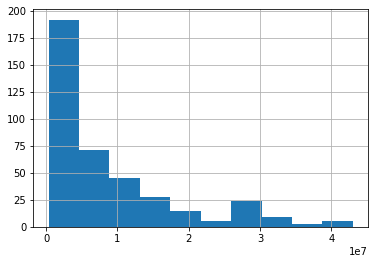

In [207]:
nba_2020_stats['Salary'].hist()


<AxesSubplot:xlabel='PTS', ylabel='Salary'>

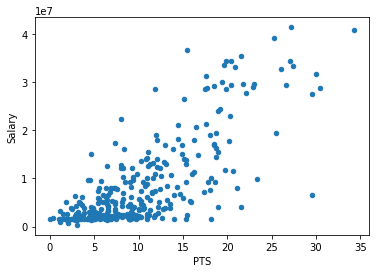

In [213]:
nba_2020_stats = train_set.copy()
nba_2020_stats.plot(kind="scatter", x='PTS', y='Salary')

<AxesSubplot:xlabel='MP', ylabel='Salary'>

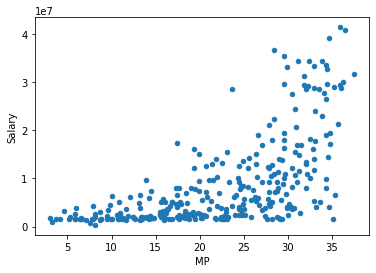

In [214]:
nba_2020_stats.plot(kind='scatter', x='MP', y='Salary')

In [215]:
corr_matrix = nba_2020_stats.corr()

In [216]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary    1.000000
PTS       0.762866
FGA       0.745408
FG        0.742079
FT        0.739146
FTA       0.731487
TOV       0.703682
2PA       0.693453
2P        0.670387
MP        0.637759
AST       0.608506
DRB       0.589147
GS        0.574573
TRB       0.523496
STL       0.506912
3PA       0.501888
3P        0.476529
PF        0.387969
Age       0.331283
G         0.268486
ORB       0.259004
BLK       0.257133
FT%       0.169998
3P%       0.120706
FG%       0.090076
eFG%      0.085096
2P%       0.031728
Rk       -0.031996
Name: Salary, dtype: float64

In [217]:
nba_2020_stats.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,3.170000e+02
mean,265.091483,25.384858,48.924290,24.829653,22.000315,3.716404,8.094637,0.455754,1.103785,3.093691,...,0.915773,3.176972,4.092429,2.167823,0.697792,0.464038,1.269401,1.925237,10.175079,8.462461e+06
std,149.115794,4.003577,19.348256,24.576978,8.517326,2.275749,4.763476,0.083386,0.876911,2.246169,...,0.763944,1.923211,2.542613,1.844399,0.402164,0.432794,0.840120,0.740933,6.436366,9.102240e+06
min,2.000000,19.000000,2.000000,0.000000,3.000000,0.000000,0.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,3.400000e+05
25%,143.000000,22.000000,36.000000,2.000000,15.800000,2.000000,4.500000,0.414000,0.400000,1.400000,...,0.400000,1.800000,2.300000,1.000000,0.400000,0.200000,0.700000,1.500000,5.400000,2.033160e+06
50%,262.000000,25.000000,56.000000,16.000000,22.500000,3.300000,7.100000,0.445000,1.000000,2.800000,...,0.700000,2.900000,3.700000,1.500000,0.600000,0.300000,1.100000,1.900000,9.000000,4.588680e+06
75%,394.000000,28.000000,64.000000,50.000000,29.300000,4.900000,11.000000,0.484000,1.600000,4.400000,...,1.200000,4.000000,5.200000,2.800000,0.900000,0.600000,1.600000,2.400000,13.500000,1.140000e+07
max,529.000000,39.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.742000,4.400000,12.400000,...,4.400000,11.400000,15.200000,10.200000,2.000000,2.900000,4.800000,4.100000,34.300000,4.135881e+07


In [219]:
nba_2020_stats = train_set.drop("Salary", axis=1)
labels = train_set['Salary'].copy()

In [222]:
sample_incomplete_rows = nba_2020_stats[nba_2020_stats.isnull().any(axis=1)].head()
sample_incomplete_rows

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Joakim Noah,368,C,34,LAC,5,0,10.0,0.8,1.6,0.500,...,0.750,1.0,2.2,3.2,1.4,0.2,0.2,1.2,1.8,2.8
Clint Capela,87,C,25,HOU,39,39,32.8,6.3,9.9,0.629,...,0.529,4.3,9.5,13.8,1.2,0.8,1.8,1.6,2.6,13.9
Henry Ellenson,144,C,23,BRK,5,0,3.0,0.2,1.4,0.143,...,NaN,0.4,0.8,1.2,0.2,0.0,0.0,0.0,0.2,0.4
Rudy Gobert,176,C,27,UTA,68,68,34.3,5.7,8.2,0.693,...,0.630,3.4,10.1,13.5,1.5,0.8,2.0,1.9,3.2,15.1
Richaun Holmes,226,C,26,SAC,44,38,28.2,5.1,7.8,0.648,...,0.788,2.9,5.3,8.1,1.0,0.9,1.3,1.2,3.8,12.3


In [223]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [226]:
nba_2020_stats_num = nba_2020_stats.drop(["Rk", "Pos", "Tm"], axis=1)

In [228]:
imputer.fit(nba_2020_stats_num)

SimpleImputer(strategy='median')

In [229]:
imputer.statistics_

array([25.    , 56.    , 16.    , 22.5   ,  3.3   ,  7.1   ,  0.445 ,
        1.    ,  2.8   ,  0.3475,  2.1   ,  4.1   ,  0.515 ,  0.526 ,
        1.1   ,  1.5   ,  0.776 ,  0.7   ,  2.9   ,  3.7   ,  1.5   ,
        0.6   ,  0.3   ,  1.1   ,  1.9   ,  9.    ])

In [231]:
X = imputer.transform(nba_2020_stats_num)
X

array([[21. , 55. ,  1. , ...,  1.4,  1.3, 10.3],
       [29. , 69. , 18. , ...,  0.8,  2. ,  6.6],
       [27. , 21. , 21. , ...,  0.9,  2.2, 11. ],
       ...,
       [22. , 59. , 59. , ...,  2.2,  1.7, 18.5],
       [28. , 59. , 57. , ...,  0.5,  1.7,  8. ],
       [20. , 36. , 28. , ...,  0.6,  2.7,  6.8]])

In [233]:
nba_2020_stats_transformed = pd.DataFrame(X, columns=nba_2020_stats_num.columns, index=nba_2020_stats_num.index)
nba_2020_stats_transformed.loc[sample_incomplete_rows.index.values]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Joakim Noah,34.0,5.0,0.0,10.0,0.8,1.6,0.500,0.0,0.0,0.3475,...,0.750,1.0,2.2,3.2,1.4,0.2,0.2,1.2,1.8,2.8
Clint Capela,25.0,39.0,39.0,32.8,6.3,9.9,0.629,0.0,0.0,0.3475,...,0.529,4.3,9.5,13.8,1.2,0.8,1.8,1.6,2.6,13.9
Henry Ellenson,23.0,5.0,0.0,3.0,0.2,1.4,0.143,0.0,0.8,0.0000,...,0.776,0.4,0.8,1.2,0.2,0.0,0.0,0.0,0.2,0.4
Rudy Gobert,27.0,68.0,68.0,34.3,5.7,8.2,0.693,0.0,0.0,0.3475,...,0.630,3.4,10.1,13.5,1.5,0.8,2.0,1.9,3.2,15.1
Richaun Holmes,26.0,44.0,38.0,28.2,5.1,7.8,0.648,0.0,0.0,0.3475,...,0.788,2.9,5.3,8.1,1.0,0.9,1.3,1.2,3.8,12.3


In [235]:
nba_2020_stats_cat = nba_2020_stats[["Pos", "Tm"]]
nba_2020_stats_cat.head(10)

,Pos,Tm
Player,,
Malik Monk,SG,CHO
James Ennis,SF-SG,TOT
Rodney Hood,SF,POR
Bruno Caboclo,C,TOT
Wesley Matthews,SG,MIL
Terence Davis,SG,TOR
Thaddeus Young,PF,CHI
De'Aaron Fox,PG,SAC
Fred VanVleet,SG,TOR


In [236]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
nba_2020_stats_cat_1hot = cat_encoder.fit_transform(nba_2020_stats_cat)
nba_2020_stats_cat_1hot

<317x43 sparse matrix of type '<class 'numpy.float64'>'
	with 634 stored elements in Compressed Sparse Row format>

In [240]:
nba_2020_stats_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [239]:
cat_encoder.categories_

[array(['C', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-C', 'SF-PF',
        'SF-SG', 'SG', 'SG-PG'], dtype=object),
 array(['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET',
        'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
        'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
        'TOR', 'TOT', 'UTA', 'WAS'], dtype=object)]

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

nba_2020_stats_num_transformed = num_pipeline.fit_transform(nba_2020_stats_num)

In [243]:
nba_2020_stats_num_transformed

array([[-1.09696663,  0.31451494, -0.97112543, ...,  0.15569905,
        -0.84518481,  0.01943933],
       [ 0.90440558,  1.03923837, -0.27832758, ..., -0.55961398,
         0.10106398, -0.55632804],
       [ 0.40406253, -1.44552767, -0.15606914, ..., -0.44039514,
         0.37142077,  0.12836829],
       ...,
       [-0.8467951 ,  0.52157878,  1.39253781, ...,  1.10944976,
        -0.30447122,  1.29546431],
       [ 0.65423405,  0.52157878,  1.31103218, ..., -0.9172705 ,
        -0.30447122, -0.33847012],
       [-1.34713815, -0.66903828,  0.12920056, ..., -0.79805166,
         1.04731276, -0.52520548]])

In [245]:
nba_2020_stats = nba_2020_stats.drop("Rk", axis=1)

In [246]:
from sklearn.compose import ColumnTransformer

num_attribs = list(nba_2020_stats_num)
cat_attribs = ["Pos", "Tm"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

nba_2020_stats_prepared = full_pipeline.fit_transform(nba_2020_stats)

In [248]:
nba_2020_stats_prepared.shape

(317, 69)

In [249]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(nba_2020_stats_prepared, labels)

LinearRegression()

In [250]:
some_data = nba_2020_stats.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [2803287.71719351 -671748.3753882  6191511.76834143 3527403.65825361
 7607089.30200426]


In [253]:
some_labels

Player
Malik Monk          5345687.0
James Ennis         3300000.0
Rodney Hood        10047450.0
Bruno Caboclo       2028594.0
Wesley Matthews     3623000.0
Name: Salary, dtype: float64

In [262]:
lebron_data = nba_2020_stats.iloc[9:10]
lebron_label = labels.iloc[9:10]
lebron_data_prepared = full_pipeline.transform(lebron_data)

lin_reg.predict(lebron_data_prepared)

array([32081183.65244877])

In [266]:
lebron_label

Player
LeBron James    39219565.0
Name: Salary, dtype: float64

In [269]:
jamal_murray_data = nba_2020_stats.iloc[314:315]
jamal_murray_label = labels.iloc[314:315]
jamal_murray_data_prepared = full_pipeline.transform(jamal_murray_data)

lin_reg.predict(jamal_murray_data_prepared)

array([17319258.30821105])

In [270]:
jamal_murray_label

Player
Jamal Murray    29250000.0
Name: Salary, dtype: float64

In [274]:
westbrook_data = nba_2020_stats.iloc[22:23]
westbrook_label = labels.iloc[22:23]
westbrook_data_prepared = full_pipeline.transform(westbrook_data)

lin_reg.predict(westbrook_data_prepared)

array([31037776.78244444])

In [275]:
westbrook_label

Player
Russell Westbrook    41358814.0
Name: Salary, dtype: float64

In [287]:
salary_predictions = lin_reg.predict(nba_2020_stats_prepared)

In [307]:
nba_2020_stats

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Malik Monk,SG,21,CHO,55,1,21.3,3.9,8.9,0.434,1.1,...,0.820,0.5,2.4,2.9,2.1,0.5,0.3,1.4,1.3,10.3
James Ennis,SF-SG,29,TOT,69,18,18.3,2.3,5.2,0.446,0.8,...,0.806,1.0,2.5,3.6,0.9,0.5,0.3,0.8,2.0,6.6
Rodney Hood,SF,27,POR,21,21,29.5,4.1,8.2,0.506,1.7,...,0.778,0.5,3.0,3.4,1.5,0.8,0.2,0.9,2.2,11.0
Bruno Caboclo,C,24,TOT,30,0,8.1,1.3,3.0,0.427,0.2,...,0.889,0.8,1.2,2.0,0.4,0.5,0.6,0.4,1.0,3.0
Wesley Matthews,SG,33,MIL,67,67,24.4,2.5,6.3,0.396,1.6,...,0.765,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alex Caruso,PG,25,LAL,64,2,18.4,1.9,4.5,0.412,0.6,...,0.734,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5
Andre Drummond,C,26,TOT,57,56,33.0,7.3,13.8,0.533,0.1,...,0.575,4.4,10.8,15.2,2.7,1.9,1.6,3.6,3.5,17.7
Jamal Murray,PG,22,DEN,59,59,32.3,6.9,15.2,0.456,1.9,...,0.881,0.8,3.2,4.0,4.8,1.1,0.3,2.2,1.7,18.5


In [305]:
lin_reg.coef_ # coefficients of model

array([ 1.79246775e+06, -9.58587040e+05,  3.62923271e+05, -1.73538095e+06,
        3.67014093e+06,  3.32447013e+07, -3.30920083e+05, -2.84681677e+06,
       -1.24757048e+07, -4.85118182e+05, -6.00377842e+06, -2.00113295e+07,
        3.84190451e+05,  3.42463264e+04,  5.23181211e+06, -3.63141545e+06,
       -6.26683767e+05, -3.35399259e+06, -4.99505159e+06,  9.89538416e+06,
        1.19631603e+06,  9.61105613e+05,  2.64533089e+05, -6.17224923e+04,
       -5.95845910e+05,  2.12667654e+06,  3.23282020e+06,  2.06988080e+06,
        5.28388546e+05,  2.10613879e+06,  5.75759618e+05, -8.72400858e+05,
        2.33729708e+06,  7.10464701e+05,  6.23930049e+05, -3.52341077e+06,
        8.34232334e+05, -8.62310049e+06, -6.14057886e+06,  2.07589572e+06,
       -1.64429082e+06,  5.10094023e+03, -2.31290111e+06,  2.66788675e+05,
        5.41667564e+05,  2.59783516e+06,  9.07264156e+05, -3.48389189e+06,
        5.15007288e+05,  1.06591625e+06,  1.50077595e+06,  1.17890673e+06,
        5.37834889e+05, -

In [291]:
np.argmax(salary_predictions) # James Harden

141

In [349]:
top_30 = salary_predictions.argsort()[-30:][::-1] # top 30 salaries predicted by model

In [385]:
accuracy = lin_reg.score(X_test_prepared, y_test)
accuracy

0.45859897392359183

In [351]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(labels, salary_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4625537.86446948

In [388]:
# for salary in top_30:
#     print(nba_2020_stats.iloc[salary:salary+1].index.values[0], 
#           salary_predictions[salary], labels[nba_2020_stats.iloc[salary:salary+1].index.values[0]])

nba_list_seen = []

for salary in top_30:
    nba_list_seen.append((nba_2020_stats.iloc[salary:salary+1].index.values[0], 
          salary_predictions[salary], labels[nba_2020_stats.iloc[salary:salary+1].index.values[0]]))
    
df_seen = pd.DataFrame(nba_list_seen, columns =['Name', 'Predicted', 'Actual']) 
df_seen['Predicted'] = df_seen['Predicted'].apply(lambda x: '{:.2f}'.format(x))
df_seen

,Name,Predicted,Actual
0,James Harden,42701988.62,40824000.0
1,Kawhi Leonard,34738124.70,34379100.0
2,LeBron James,32081183.65,39219565.0
3,Damian Lillard,31270754.23,31626953.0
4,Russell Westbrook,31037776.78,41358814.0
5,Giannis Antetokounmpo,31005980.09,27528090.0
6,Joel Embiid,30440786.12,29542010.0
7,Anthony Davis,30308360.18,32742000.0
8,Bradley Beal,28643254.27,28751775.0
9,Jimmy Butler,28214702.45,34379100.0


In [370]:
X_test = test_set.drop(["Salary", "Rk"], axis=1)
y_test = test_set['Salary'].copy()

X_test_prepared = full_pipeline.transform(X_test)
new_salary_predictions = lin_reg.predict(X_test_prepared)

top_30_unseen = new_salary_predictions.argsort()[-30:][::-1] # top 30 unseen salaries predicted by model

In [372]:
# for salary in top_30_unseen:
#     print(X_test.iloc[salary:salary+1].index.values[0], 
#           new_salary_predictions[salary], y_test[X_test.iloc[salary:salary+1].index.values[0]])
nba_list = []
for salary in top_30_unseen:
    nba_list.append((X_test.iloc[salary:salary+1].index.values[0], 
          new_salary_predictions[salary], y_test[X_test.iloc[salary:salary+1].index.values[0]]))

In [389]:
df_unseen = pd.DataFrame(nba_list, columns =['Name', 'Predicted', 'Actual']) 
df_unseen['Predicted'] = df_unseen['Predicted'].apply(lambda x: '{:.2f}'.format(x))
df_unseen

,Name,Predicted,Actual
0,Luka Dončić,31792032.38,8049360.0
1,Stephen Curry,28326576.30,43006362.0
2,Nikola Vučević,25380151.43,26000000.0
3,Karl-Anthony Towns,24966808.29,29430000.0
4,Chris Paul,22269346.08,41358814.0
5,D'Angelo Russell,22205550.70,28649250.0
6,Jusuf Nurkić,21998286.62,12000000.0
7,Lou Williams,21927256.90,8000000.0
8,Donovan Mitchell,20749561.00,5195501.0
9,Al Horford,19106990.90,27500000.0


In [386]:
df_final = pd.concat([df, df_seen], ignore_index=True)
df_final = df_final.sort_values(by=["Predicted"], ascending=False)
df_final

,Name,Predicted,Actual
30,James Harden,42701988.62,40824000.0
31,Kawhi Leonard,34738124.70,34379100.0
32,LeBron James,32081183.65,39219565.0
0,Luka Dončić,31792032.38,8049360.0
33,Damian Lillard,31270754.23,31626953.0
34,Russell Westbrook,31037776.78,41358814.0
35,Giannis Antetokounmpo,31005980.09,27528090.0
36,Joel Embiid,30440786.12,29542010.0
37,Anthony Davis,30308360.18,32742000.0
38,Bradley Beal,28643254.27,28751775.0
